In [1]:
import pandas as pd
import numpy as np
data_loc = "Side Effects.json"

In [3]:
data = pd.read_json(data_loc)
data.drop("link", inplace=True)

## Create drug json for further scraping

In [4]:
data_clean = data.replace(np.nan, "")
data_clean_t = data_clean.transpose()

In [5]:
data_clean_dic = {}
for col_name in data_clean_t.columns:
    col = data_clean_t[col_name]
    col = col[col!=""]
    data_clean_dic.update({col_name:{"se":list(col.index),
                                    "link":col[0]}
                          })

In [6]:
import json
with open("Drugs.json", "w+") as f:
    json.dump(data_clean_dic, f)

## Charts

In [7]:
sideEffects = data.count(axis=0)
drugs = data.count(axis=1)

drugs.sort_values(axis=0, ascending=False, inplace=True)
sideEffects.sort_values(axis=0, ascending=False, inplace=True)

In [8]:
drugs = drugs[drugs>500]
sideEffects = sideEffects[sideEffects>700]

In [9]:
import matplotlib.pyplot as plt

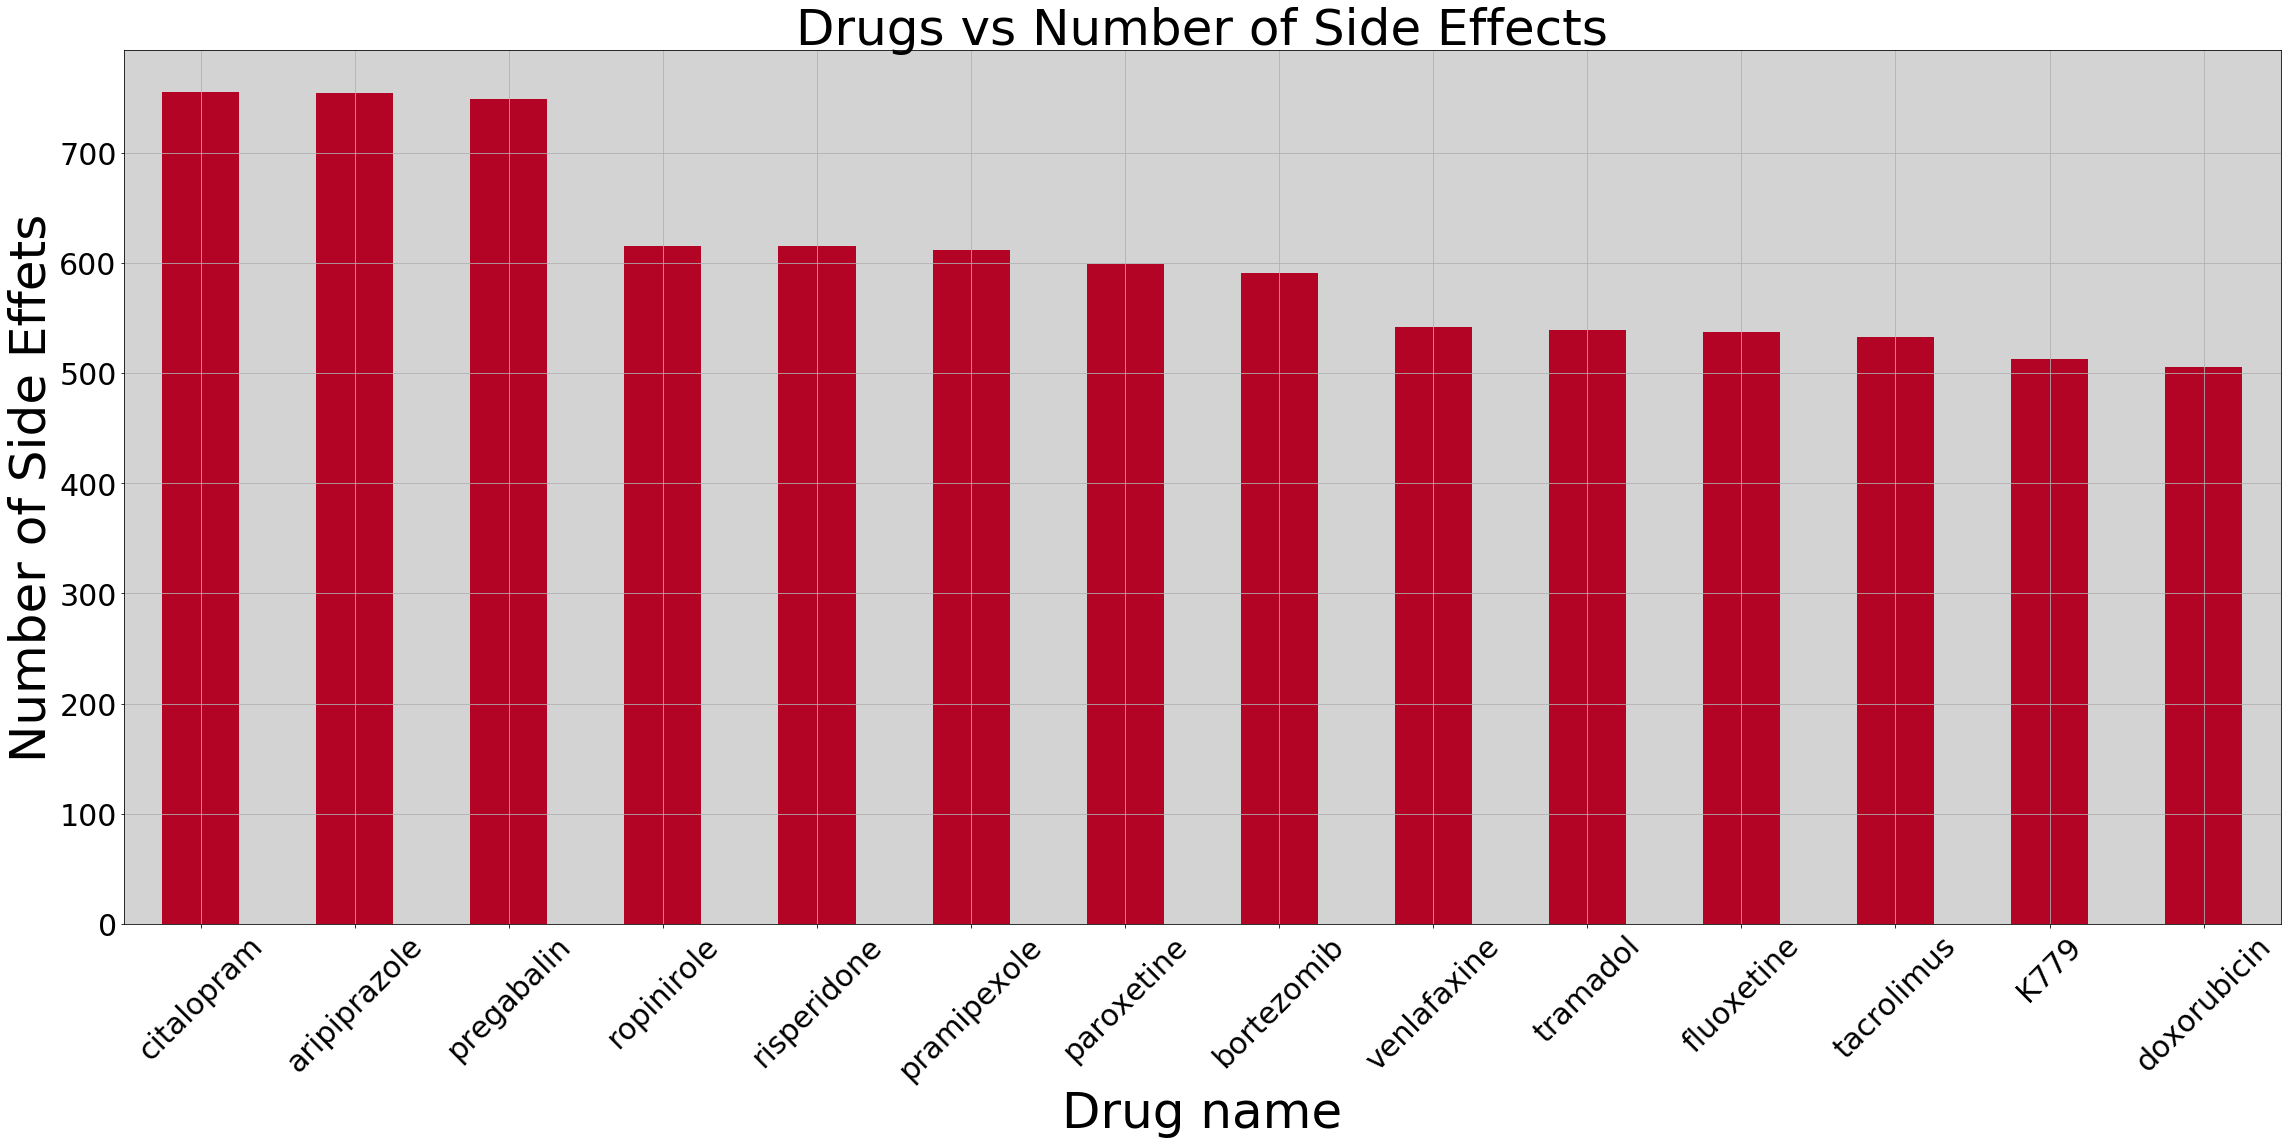

In [10]:
fig = plt.figure(figsize=(32,16))
ax = drugs.plot(kind="bar", fontsize=30, rot = 45, colormap="coolwarm_r")
ax.set_facecolor("lightgray")
ax.set_xlabel("Drug name", fontsize=50)
ax.set_ylabel("Number of Side Effets", fontsize=50)
ax.set_title("Drugs vs Number of Side Effects", fontsize = 50)
plt.tight_layout()
ax.grid()
fig.savefig("drugs.png")

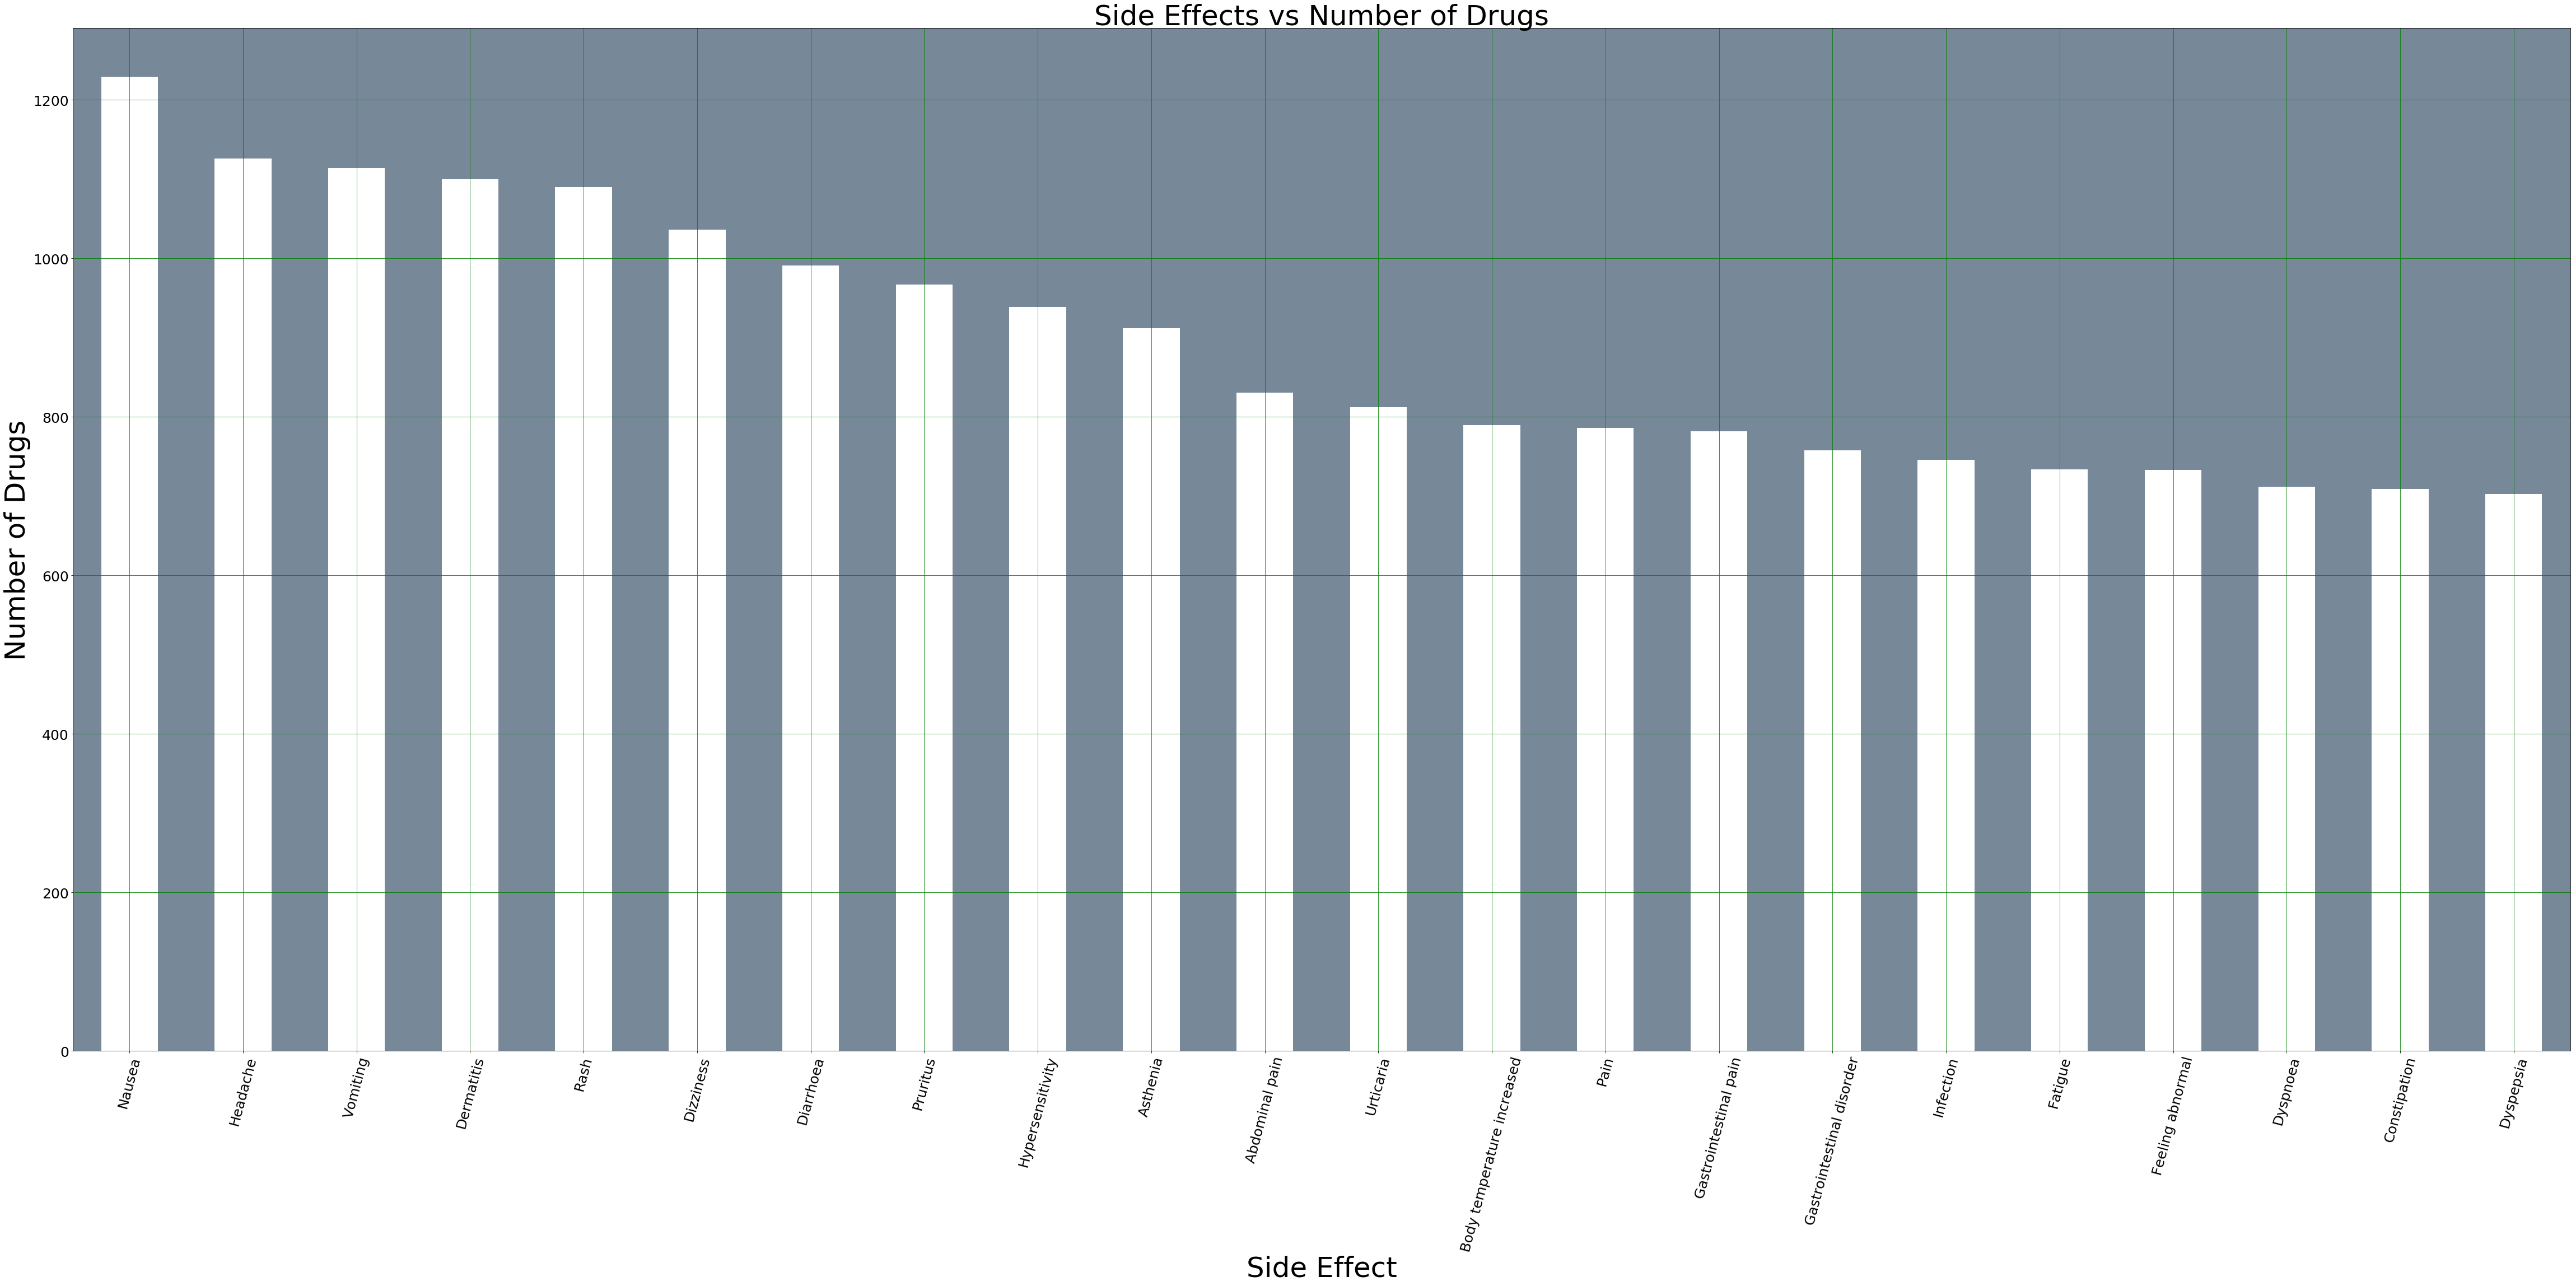

In [11]:
fig = plt.figure(figsize=(64,32))
ax = sideEffects.plot(kind="bar", fontsize=25, rot = 75, colormap="gist_yarg")
ax.set_facecolor("lightslategray")
ax.set_xlabel("Side Effect", fontsize=50)
ax.set_ylabel("Number of Drugs", fontsize=50)
ax.set_title("Side Effects vs Number of Drugs", fontsize = 50)
plt.tight_layout()
ax.grid(color="g")
fig.savefig("side effects.png")

## Updated Data including commonality

In [14]:
import json
with open("../../Drugs1.json") as f:
    dat = json.load(f)

In [15]:
for drug in dat:
    for se in dat[drug]:
        if not dat[drug][se]:
            dat[drug][se] = 0

In [16]:
# From http://i-base.info/qa/812
# 
#     Very common affects more than 1 in 10 people – ie the risk is 10% or higher
#     Common affects between 1 in 100 and 1 in 10 people – ie risk is 1% to 10%
#     Uncommon affects between 1 in 1,000 and 1 in 100 people – ie risk is 0.1% to 1%
#     Rare affects between 1 in 10,000 and 1 in 1,000 people – ie risk is 0.01% to 0.1%
#     Very rare affects less than 1 in 10,000 people – ie risk is less than 0.01% (This includes isolated reports, or where the absolute risk is not known or can’t be quantified. For example, if identified through post-marketing safety surveillance and the frequency cannot be estimated from the available data).


alt = {
    "frequent":50,
    "infrequent":0.5,
    "rare":0.05,
    "very common":10,
    "common":5,
    "uncommon":0.5,
    "very rare":0.01,
    '0':0,
    0:0.00,
    "postmarketing":0
}

In [17]:
errors = {}
for drug in dat:
    for se in dat[drug]:
        try:
            dat[drug][se] = alt[dat[drug][se]]
        except Exception as e:
            if type(dat[drug][se]) == str:
                if "%" in dat[drug][se] and "-" in dat[drug][se]:
                    try:
                        dat[drug][se] = dat[drug][se].replace("%","")
                        tmp = [float(i) for i in dat[drug][se].split("-")]
                        dat[drug][se] = sum(tmp)/2
                    except:
                        errors[drug] = {}
                        errors[drug][se] = dat[drug][se]
                
                elif "%" in dat[drug][se]:
                    try:
                        dat[drug][se] = float(dat[drug][se].replace("%",""))
                    except:
                        errors[drug] = {}
                        errors[drug][se] = dat[drug][se]
                elif "-" in dat[drug][se]:
                    try:
                        tmp = [float(i) for i in dat[drug][se].split("-")]
                        dat[drug][se] = sum(tmp)/2
                    except:
                        errors[drug] = {}
                        errors[drug][se] = dat[drug][se]
                else:
                    errors[drug] = {}
                    errors[drug][se] = dat[drug][se]
            else:
                errors[drug] = {}
                errors[drug][se] = dat[drug][se]

In [18]:
dat_df = pd.DataFrame(dat)

In [19]:
dat_agg_count = dat_df.T.aggregate(func="count")
dat_agg_mean = dat_df.T.aggregate(func="mean")
data = pd.DataFrame({"Drug Count":dat_agg_count, "Average Percentage":dat_agg_mean})

In [21]:
data

,Average Percentage,Drug Count
5'nucleotidase increased,0.000035,1430
AGEP,0.000000,1430
AIDS dementia complex,0.000000,1430
AION,0.000000,1430
AML progression,0.000000,1430
ANA increased,0.000000,1430
Abasia,0.000000,1430
Abdominal abscess,0.001469,1430
Abdominal adhesions,0.000350,1430
Abdominal aortic aneurysm,0.000035,1430
